In [1]:
# Losev Ivan 19 IAD
#
# Dataset: https://archive.ics.uci.edu/ml/datasets/Abalone
# Num of Attributes: 9
# Num of Instances 4177
#
# Task: Classification
# Goal: Predict the age of abalone from physical measurements

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

import os

In [3]:
df  = pd.read_csv(os.getcwd() + '\\abalone.data', header=None)
df.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
       'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

print(df.shape)
df.head()

(4177, 9)


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Данные представлены 4177 строками, каждая из которых содержит 9 признаков:
1) Пол -  {M, F, I}, распределён равномерно
2) Физические характеристики - Length, Diameter, ... Shell weight, представленные типом float
3) Целевой параметер - Rings, который необходимо предсказазть (int)

In [4]:
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

После добавления пропусков нужно их устранить.
Для этого заменим пропуски средними значениями.

Кроме того уберём данные, в которых неизвестен пол.

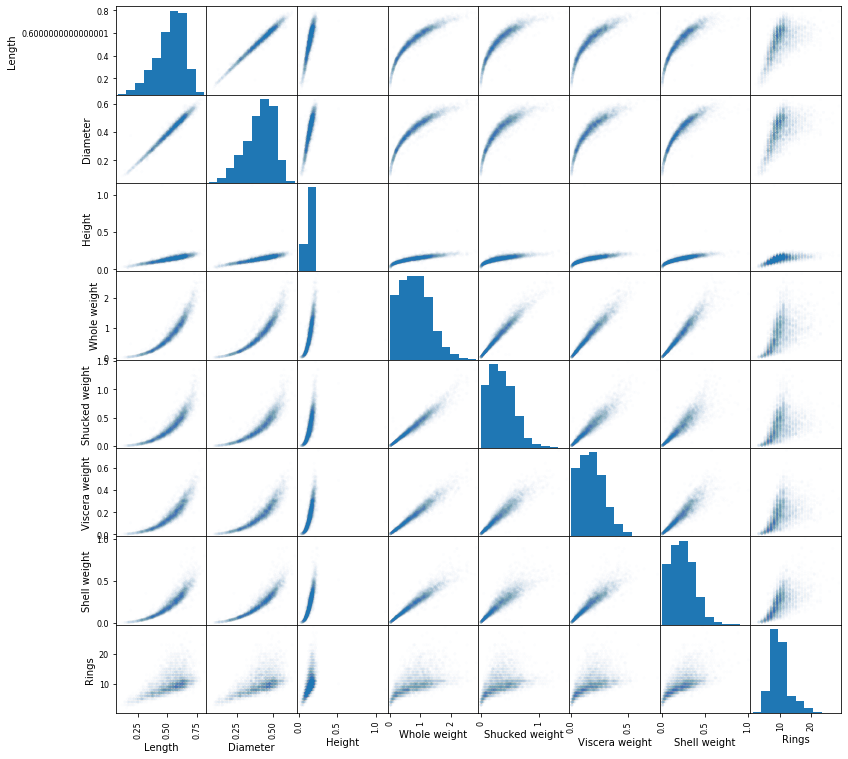

In [5]:
pd.plotting.scatter_matrix(df, alpha = .01, figsize = (13, 13))
pass

Рассматривая матрицу можно заметить, что, например, зависимость между Length и Shucked weight и Diameter и Whole weight похожа на квадратичную. Также, многие графии с Height похожи на график квадратного корня.

Кроме того, интересно количество колец. Как видно на графике, большое кол-во значений превышает значение 10.

In [6]:
df.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


Глядя на таблицу можно заметить, что существует высокая корреляция между физическими параметрами (> 0,8)
При этом, корреляция между количеством колец и остальными параметрами заметно ниже (0,4-0,6)

In [7]:
for columnName in df.columns:
    if isinstance(df[columnName][0], str):
        print('{0:20}{1}'.format(columnName, ' contains string'))
    elif columnName != 'Rings':
        print('Mean   of {0:17} {1:.5}'.format(columnName + ':', df[columnName].mean()))
        print('Median of {0:17} {1:.5}'.format(columnName + ':', df[columnName].median()))
        print('Min    of {0:17} {1:.5}'.format(columnName + ':', df[columnName].min()))
        print('Max    of {0:17} {1:.5}'.format(columnName + ':', df[columnName].max()))
    else:
        print('Mean   of {0:17} {1:.5}'.format(columnName + ':', df[columnName].mean()))
        print('Median of {0:17} {1:.5}'.format(columnName + ':', df[columnName].median()))
        
    print('{:*^40}'.format(''))

Sex                  contains string
****************************************
Mean   of Length:           0.52399
Median of Length:           0.545
Min    of Length:           0.075
Max    of Length:           0.815
****************************************
Mean   of Diameter:         0.40788
Median of Diameter:         0.425
Min    of Diameter:         0.055
Max    of Diameter:         0.65
****************************************
Mean   of Height:           0.13952
Median of Height:           0.14
Min    of Height:           0.0
Max    of Height:           1.13
****************************************
Mean   of Whole weight:     0.82874
Median of Whole weight:     0.7995
Min    of Whole weight:     0.002
Max    of Whole weight:     2.8255
****************************************
Mean   of Shucked weight:   0.35937
Median of Shucked weight:   0.336
Min    of Shucked weight:   0.001
Max    of Shucked weight:   1.488
****************************************
Mean   of Viscera weight:   0.

Можно предположить, что распределения значений признаков похоже на Гаусовское распределение, сдвинутое влево или вправо, поскольку медиана совпадает со средним, но при этом они находятся не в середине распределение.

Рассмотрим это на примере Viscera weight:

0-----0.17-0.18---------------------------------------------------0.76

0.17 - Median

0.18 - Mean

Num of Rings in [7-11]:  2769 / 4177 (66.29159683983721 %)
Num of Rings in [5-7) & (11, 15]:  1073 / 4177 (25.68829303327747 %)


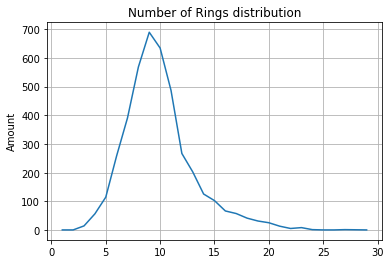

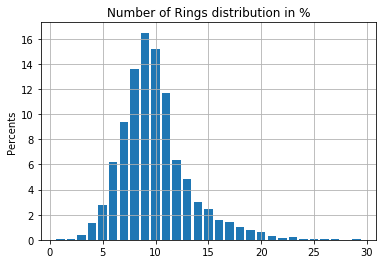

In [8]:
ringNumbers = np.sort(df['Rings'].unique())
ringNumberCounts = []
ringNumberPercents = []
for ringNum in ringNumbers:
    ringNumberCounts.append(df[df['Rings'] == ringNum]['Rings'].count())
    ringNumberPercents.append(ringNumberCounts[-1] / df['Rings'].count() * 100)

fig1, plt1 = plt.subplots()
plt1.plot(ringNumbers, ringNumberCounts)
plt1.set(title='Number of Rings distribution', ylabel='Amount')
plt1.grid()


fig2, plt2 = plt.subplots()
plt2.bar(ringNumbers, ringNumberPercents)
plt2.set(title='Number of Rings distribution in %', ylabel='Percents')
plt2.grid()

a = df[(df['Rings'] >= 7) & (df['Rings'] <= 11)]['Rings'].count()
b = df['Rings'].count()
print('Num of Rings in [7-11]: ', a, '/', b, '(' + str(a / b * 100) + ' %)') 

a = df[(df['Rings'] >= 5) & (df['Rings'] < 7) | (df['Rings'] > 11) & (df['Rings'] <= 15)]['Rings'].count()
b = df['Rings'].count()
print('Num of Rings in [5-7) & (11, 15]: ', a, '/', b, '(' + str(a / b * 100) + ' %)') 

Как видно на графиках, большинство объектов исследования имеют от 7 до 11 колец (> 66%)

Также можно выделить объекты с количеством колец от 5 до 7 и от 11 до 15. Их количество составляет 25% от общего числа.

На оставшиеся 9% приходятся объекты с количеством колец меньше 5 и больше 15

In [9]:
df.describe(include = 'all').drop(['Sex'], axis=1)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000


Выполним нормализацию физических параметров и заменим признак Sex на 3 бинарных (F, I, M)

In [10]:
numerical_data = df.drop(['Sex', 'Rings'], axis=1)
numerical_data = (numerical_data - numerical_data.mean(axis = 0))/numerical_data.std(axis = 0)
                               
                               
clear_df = pd.concat([pd.get_dummies(df['Sex']), numerical_data, df['Rings']], axis=1)
clear_df.head()

,F,I,M,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0,1,-0.574489,-0.432097,-1.064297,-0.641821,-0.607613,-0.726125,-0.638140,15
1,0,0,1,-1.448812,-1.439757,-1.183837,-1.230130,-1.170770,-1.205077,-1.212842,7
2,1,0,0,0.050027,0.122116,-0.107978,-0.309432,-0.463444,-0.356647,-0.207114,9
3,0,0,1,-0.699393,-0.432097,-0.347058,-0.637743,-0.648160,-0.607527,-0.602222,10
4,0,1,0,-1.615350,-1.540523,-1.422916,-1.271933,-1.215822,-1.287183,-1.320599,7


In [11]:
X = clear_df.drop('Rings', axis=1)
y = clear_df['Rings']
feature_names = X.columns

print(y.describe())

X = X.values
y = y.values


print(X.shape, type(X))
print(y.shape, type(y))
N, d = X.shape

count    4177.000000
mean        9.933684
std         3.224169
min         1.000000
25%         8.000000
50%         9.000000
75%        11.000000
max        29.000000
Name: Rings, dtype: float64
(4177, 10) <class 'numpy.ndarray'>
(4177,) <class 'numpy.ndarray'>


Подготовим данные для предсказания признака Rings. Также сформирует тестовую и тренировочную выборки

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

3341 836


In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(X_train, y_train)


y_test_predict = knn.predict(X_test)
test_err = 1 - knn.score(X_test, y_test)
print('test error: ', test_err)

test error:  0.7631578947368421


Как видно, метод ближайших соседей с n == 11 работает очень плохо.

In [14]:
from sklearn.model_selection import GridSearchCV

nnb = np.arange(1, 51, 2)
knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print('Best cv err:', best_cv_err, '\nBest parameter', best_n_neighbors)


D:\Programs\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Best cv err: 0.7410954803950913 
Best parameter 37


D:\Programs\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [15]:

knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print('Train error:', err_train, '\nTest  error:', err_test)


Train error: 0.6908111343909009 
Test  error: 0.7200956937799043


Используя GridSearch находим оптимальное значение параметра - 37

In [16]:

from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print('Train error:', err_train, '\nTest  error:', err_test)

Train error: 0.0 
Test  error: 0.7583732057416268


Ошибка на методу RandomForest составила 75%

In [17]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(d):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

Feature ranking:
 1. feature 'Shell weight' (0.163563)
 2. feature 'Shucked weight' (0.153590)
 3. feature 'Viscera weight' (0.148877)
 4. feature 'Whole weight' (0.148086)
 5. feature 'Diameter' (0.115094)
 6. feature 'Length' (0.114920)
 7. feature 'Height' (0.103315)
 8. feature '    M' (0.018861)
 9. feature '    F' (0.017790)
10. feature '    I' (0.015904)


Попробуем теперь разделить признаки на несколько групп и повторить эксперементы

In [18]:
original_clear_df = clear_df.copy()

clear_df.at[clear_df['Rings'] < 5, 'Rings'] = 0
clear_df.at[(clear_df['Rings'] >= 5)  & (clear_df['Rings'] < 10), 'Rings'] = 1
clear_df.at[(clear_df['Rings'] >= 10) & (clear_df['Rings'] < 15), 'Rings'] = 2
clear_df.at[(clear_df['Rings'] >= 15) & (clear_df['Rings'] < 20), 'Rings'] = 3
clear_df.at[clear_df['Rings'] >= 20, 'Rings'] = 4

X = clear_df.drop('Rings', axis=1)
y = clear_df['Rings']

feature_names = X.columns

X = X.values
y = y.values

# --------------------- Split data on train and test ---------------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

# -------------------------   KNeighborsClassifier       -----------------------------------------------

knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(X_train, y_train)


y_test_predict = knn.predict(X_test)
test_err = 1 - knn.score(X_test, y_test)
print('KNeighborsClassifier test error: ', test_err)

# -------------------------          GridSearchCV        -----------------------------------------------

nnb = np.arange(1, 51, 2)
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print('GridSearchCV: ', best_cv_err, best_n_neighbors)

# -------------------------   KNeighborsClassifier       -----------------------------------------------

knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print('KNeighborsClassifier: ', err_train, err_test)

# -------------------------   RandomForestClassifier      -----------------------------------------------

rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print('RandomForestClassifier: ', err_train, err_test)


importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(d):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

KNeighborsClassifier test error:  0.3241626794258373
GridSearchCV:  0.3052978150254415 31
KNeighborsClassifier:  0.2849446273570787 0.30861244019138756
RandomForestClassifier:  0.0 0.326555023923445
Feature ranking:
 1. feature 'Shell weight' (0.210376)
 2. feature 'Viscera weight' (0.147272)
 3. feature 'Whole weight' (0.145458)
 4. feature 'Shucked weight' (0.140991)
 5. feature 'Height' (0.110795)
 6. feature 'Diameter' (0.097956)
 7. feature 'Length' (0.093304)
 8. feature '    I' (0.026821)
 9. feature '    F' (0.014540)
10. feature '    M' (0.012487)


Как видно, выбранное разбиение улучшило предсказание. Попробуем разделить на группы, опираясь на распределение признака

In [19]:
clear_df = original_clear_df.copy()

clear_df.at[clear_df['Rings'] < 7, 'Rings'] = 0
clear_df.at[(clear_df['Rings'] >= 7)  & (clear_df['Rings'] < 12), 'Rings'] = 1
clear_df.at[(clear_df['Rings'] >= 12) & (clear_df['Rings'] < 16), 'Rings'] = 2
clear_df.at[(clear_df['Rings'] >= 16) & (clear_df['Rings'] < 20), 'Rings'] = 3
clear_df.at[clear_df['Rings'] >= 20, 'Rings'] = 4

X = clear_df.drop('Rings', axis=1)
y = clear_df['Rings']

feature_names = X.columns

X = X.values
y = y.values


N, d = X.shape

# --------------------- Split data on train and test ---------------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

# -------------------------   KNeighborsClassifier       -----------------------------------------------

knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(X_train, y_train)


y_test_predict = knn.predict(X_test)
test_err = 1 - knn.score(X_test, y_test)
print('KNeighborsClassifier test error: ', test_err)

# -------------------------          GridSearchCV        -----------------------------------------------

nnb = np.arange(1, 51, 2)
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print('GridSearchCV: ', best_cv_err, best_n_neighbors)

# -------------------------   KNeighborsClassifier       -----------------------------------------------

knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print('KNeighborsClassifier: ', err_train, err_test)
RESULT_MAP = {'With sex':
             {
                 'KNN':{},
                 'RF':{}
             }}
RESULT_MAP['With sex']['KNN']['train'] = err_train
RESULT_MAP['With sex']['KNN']['test'] = err_test

# -------------------------   RandomForestClassifier      -----------------------------------------------

rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print('RandomForestClassifier: ', err_train, err_test)
RESULT_MAP['With sex']['RF']['train'] = err_train
RESULT_MAP['With sex']['RF']['test'] = err_test

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(d):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

KNeighborsClassifier test error:  0.27392344497607657
GridSearchCV:  0.28943430110745283 13
KNeighborsClassifier:  0.2627955701885663 0.2727272727272727
RandomForestClassifier:  0.0 0.2751196172248804
Feature ranking:
 1. feature 'Shell weight' (0.193218)
 2. feature 'Shucked weight' (0.159246)
 3. feature 'Whole weight' (0.151000)
 4. feature 'Viscera weight' (0.137650)
 5. feature 'Diameter' (0.115565)
 6. feature 'Length' (0.103062)
 7. feature 'Height' (0.099403)
 8. feature '    I' (0.014899)
 9. feature '    M' (0.013264)
10. feature '    F' (0.012694)


Продолжив эксперементы можно подобрать оптимальную группировку колец.

Сейчас же стоит обратить внимание на то, что в дереве решение значения пола почти не влияли на результат, поэтому попробуем их убрать

In [20]:
clear_df = original_clear_df.copy()

clear_df.at[clear_df['Rings'] < 7, 'Rings'] = 0
clear_df.at[(clear_df['Rings'] >= 7)  & (clear_df['Rings'] < 12), 'Rings'] = 1
clear_df.at[(clear_df['Rings'] >= 12) & (clear_df['Rings'] < 16), 'Rings'] = 2
clear_df.at[(clear_df['Rings'] >= 16) & (clear_df['Rings'] < 20), 'Rings'] = 3
clear_df.at[clear_df['Rings'] >= 20, 'Rings'] = 4

X = clear_df.drop(['Rings', 'I', 'M', 'F'], axis=1)
y = clear_df['Rings']

feature_names = X.columns

X = X.values
y = y.values


N, d = X.shape

# --------------------- Split data on train and test ---------------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

# -------------------------   KNeighborsClassifier       -----------------------------------------------

knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(X_train, y_train)


y_test_predict = knn.predict(X_test)
test_err = 1 - knn.score(X_test, y_test)
print('KNeighborsClassifier test error: ', test_err)

# -------------------------          GridSearchCV        -----------------------------------------------

nnb = np.arange(1, 51, 2)
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print('GridSearchCV: ', best_cv_err, best_n_neighbors)

# -------------------------   KNeighborsClassifier       -----------------------------------------------

knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print('KNeighborsClassifier: ', err_train, err_test)
RESULT_MAP['Without sex'] = {
                 'KNN':{},
                 'RF':{}
             }
RESULT_MAP['Without sex']['KNN']['train'] = err_train
RESULT_MAP['Without sex']['KNN']['test'] = err_test

# -------------------------   RandomForestClassifier      -----------------------------------------------

rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print('RandomForestClassifier: ', err_train, err_test)
RESULT_MAP['Without sex']['RF']['train'] = err_train
RESULT_MAP['Without sex']['RF']['test'] = err_test

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(d):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

KNeighborsClassifier test error:  0.2763157894736842
GridSearchCV:  0.28703980844058663 43
KNeighborsClassifier:  0.2828494462735708 0.26555023923444976
RandomForestClassifier:  0.0 0.2703349282296651
Feature ranking:
 1. feature 'Shell weight' (0.198777)
 2. feature 'Shucked weight' (0.164991)
 3. feature 'Whole weight' (0.162413)
 4. feature 'Viscera weight' (0.145887)
 5. feature 'Diameter' (0.117622)
 6. feature 'Length' (0.109570)
 7. feature 'Height' (0.100740)


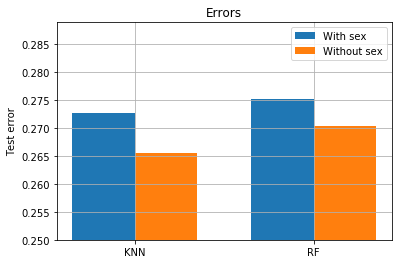

In [21]:
labels = RESULT_MAP['Without sex'].keys()


x = np.arange(len(labels))  # the label locations

y_values = {}
for type_name in RESULT_MAP:
    y_values[type_name] = []
    for method in RESULT_MAP[type_name]:
        y_values[type_name].append(RESULT_MAP[type_name][method]['test'])

width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, y_values['With sex'], width, label='With sex')
rects2 = ax.bar(x + width/2, y_values['Without sex'], width, label='Without sex')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylim(ymin=0.25)
ax.set_ylabel('Test error')
ax.set_title('Errors')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='best')
plt.grid(True)
pass